# 量子回路のコスト計算について （注：本戦課題の提出時に必要になります）

プログラムを書くとき、シンプルで無駄のないコードがそのプログラムの品質を左右するように、量子プログラミング（量子回路の設計）においても、その品質を評価する観点がいくつか存在します。

1. 量子ビット数
2. 深さ
3. 実行速度
4. 命令数

これらはどれも量子計算の結果やスループットなどに影響する重要な尺度ですが、今回のQuantum Challengeでは特に4の「命令数」を指標として、以下のようにプログラムを評価します。今回の手法で用いる値を「コスト」と呼称します。

**コスト $=$ 単一量子ビットゲートの数 $+$ CXゲートの数 $\times 10$**

任意の量子回路は単一量子ビットゲート(1量子ビットに対する命令)と2量子ビットゲートに対する命令に分解して同等な回路を構築することができます。また、現代のデバイスではCXゲートの方がノイズが乗りやすいので10倍の重み付けをしています。

**Unroller**と呼ばれるプログラムを用いることで、皆さんのお手元でもこのコストを導出することができます。<br/>
例えば、以下のような量子回路があったとします。

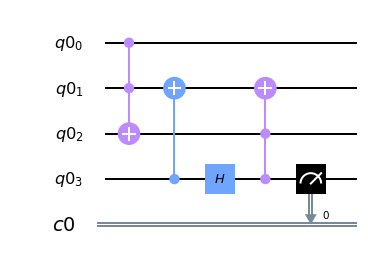

In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [3]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

この量子回路には単一量子ビットゲートやCXゲート以外のゲート(CCXゲート)が入っていますが、以下のようにunroller内で指定したゲートのみに分解することができます。

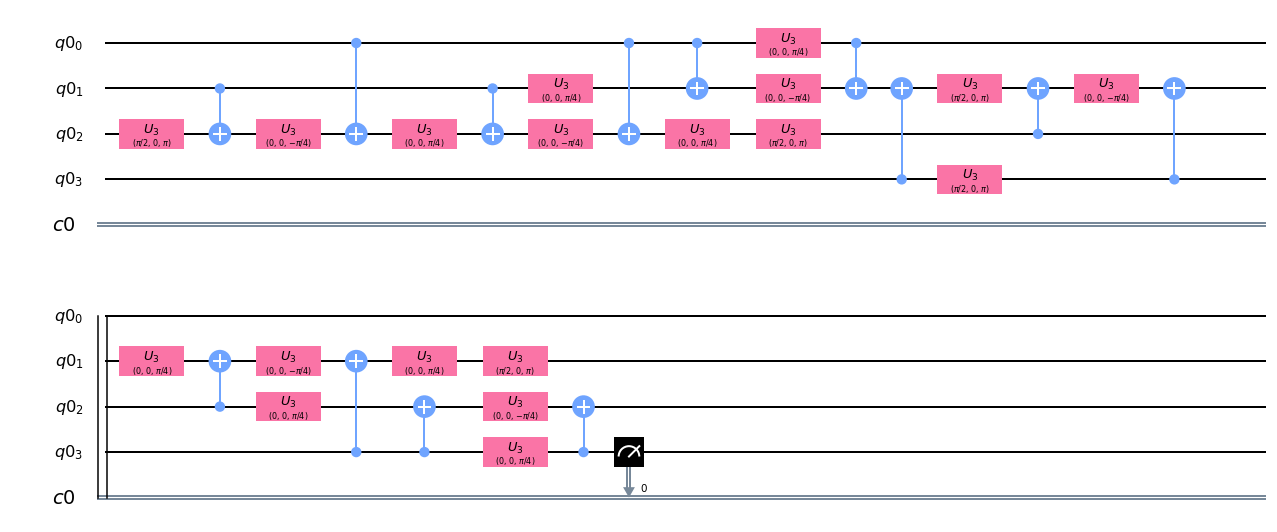

In [4]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [5]:
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

よって、この回路のコストは$19+13\times10=149$ということになります。

単一量子ビットゲートやCXゲート以外のゲートが、Unrollerによってどのように分解されるかは簡単に確認できるので、興味がある人は自分で調べてみましょう。以下ではサンプルとして、CCXゲートを単一量子ビットゲートとCXゲートに分解しています。

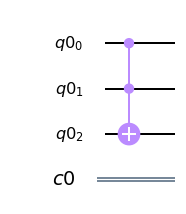

In [6]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

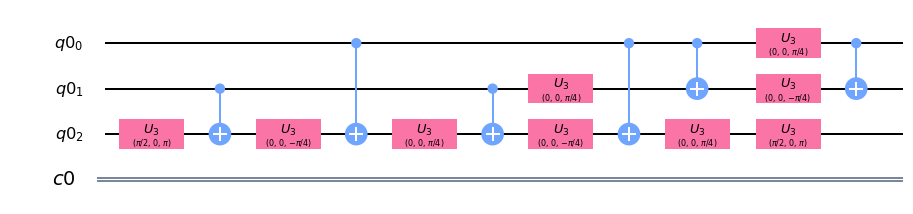

In [7]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [8]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

上記の回路のコストは$9+6\times10=69$ということになります。